# Доверительный интервал для метрик модели

In [92]:
from sklearn.datasets import load_breast_cancer

ds = load_breast_cancer()

X = ds["data"]
y = ds["target"]

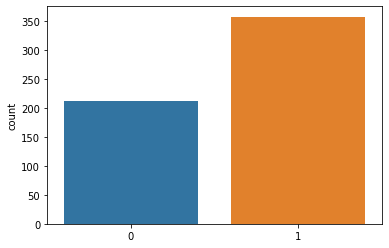

In [93]:
import seaborn as sns

sns.countplot(x=y);

In [94]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [95]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

clf = Pipeline([
    ("scaler", StandardScaler()),
    ("classifier", LogisticRegression()),
]).fit(X_train, y_train)

In [100]:
import numpy as np
import pandas as pd

from sklearn.metrics import accuracy_score, roc_auc_score

y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)[:, 1]

bootstrap_iterations = 1000

acc_scores = np.zeros(bootstrap_iterations)
roc_auc_scores = np.zeros(bootstrap_iterations)

df = pd.DataFrame({
    "y_true": y_test,
    "y_pred": y_pred,
    "y_pred_proba": y_pred_proba,
})
for i in range(bootstrap_iterations):
    sample = df.sample(frac=1.0, replace=True)
    acc_scores[i] = accuracy_score(sample.y_true, sample.y_pred)
    roc_auc_scores[i] = roc_auc_score(sample.y_true, sample.y_pred_proba)


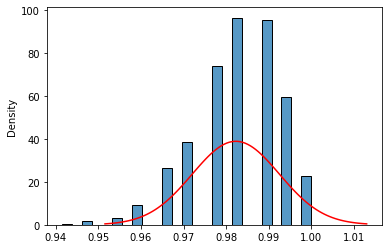

In [97]:
from scipy.stats import norm

acc_mean = acc_scores.mean()
acc_std = acc_scores.std()

acc_low = acc_mean - 3*acc_std
acc_upp = acc_mean + 3*acc_std

ax = sns.histplot(
    acc_scores,
    stat="density"
)
x = np.linspace(acc_low, acc_upp, 100)
ax.plot(x, norm.pdf(x, loc=acc_mean, scale=acc_std), color="red");

In [98]:
print(f"Model accuracy CI: ({acc_low:.3}, {acc_upp:.3})")

Model accuracy CI: (0.952, 1.01)


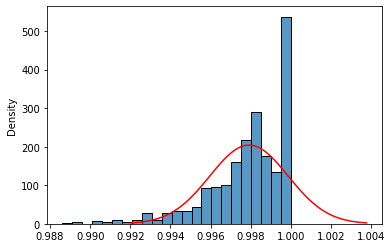

In [101]:
roc_auc_mean = roc_auc_scores.mean()
roc_auc_std = roc_auc_scores.std()

roc_auc_low = roc_auc_mean - 3*roc_auc_std
roc_auc_upp = roc_auc_mean + 3*roc_auc_std

ax = sns.histplot(
    roc_auc_scores,
    stat="density"
)
x = np.linspace(roc_auc_low, roc_auc_upp, 100)
ax.plot(x, norm.pdf(x, loc=roc_auc_mean, scale=roc_auc_std), color="red");

In [103]:
print(f"Model ROC-AUC CI: ({roc_auc_low:.3}, {roc_auc_upp:.3})")

Model ROC-AUC CI: (0.992, 1.0)
